# Machine Learning Introduction

## Neural networks

When we talk about machine learning, we usually mean an [_artifical neural network_](https://en.wikipedia.org/wiki/Artificial_neural_network).
A neural network mimics the action of neurons in your brain.  

Basic idea:

* Create a nonlinear fitting routine with free parameters
* Train the network on data with known inputs and outputs to set the parameters
* Use the trained network on new data to predict the outcome

We can think of a neural network as a map that takes a set of n parameters and returns a set of m parameters, $\mathbb{R}^n \rightarrow \mathbb{R}^m$ and we can express this as:

$${\bf z} = {\bf A} {\bf x}$$

where ${\bf x} \in \mathbb{R}^n$ are the inputs, ${\bf z} \in \mathbb{R}^m$ are the outputs, and ${\bf A}$ is an $m \times n$ matrix.

Our goal is to determine the matrix elements of ${\bf A}$.

### Some nomeclature

We can visualize a neural network as:

![NN diagram](nn_fig2.png)

* Neural networks are divided into _layers_

  * There is always an _input layer_&mdash;it doesn't do any processing
  
  * There is always an _output layer_
  
* Within a layer there are neurons or _nodes_.

  * For input, there will be one node for each input variable.
  
* Every node in the first layer connects to every node in the next layer

  * The _weight_ associated with the _connection_ can vary&mdash;these are the matrix elements.
  
* In this example, the processing is done in layer 2 (the output)

* When you train the neural network, you are adjusting the weights connecting to the nodes

  * Some connections might have zero weight
  
  * This mimics nature&mdash;a single neuron can connect to several (or lots) of other neurons.

## Universal approximation theorem and non-linearity

A neural network can be designed to approximate any function, $f(x)$.  For this to work, there must be a source of non-linearity in the network.  This is applied on a layer.  This is a result of the [universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem).

We call this an [_activation function_](https://en.wikipedia.org/wiki/Activation_function) and it has the form:


$$g({\bf x}) = \left ( \begin{array}{c} g(x_0) \\ g(x_1) \\ \vdots \\ g(x_{n-1}) \end{array} \right )$$

Then our neural network has the form: ${\bf z} = g({\bf A x})$

We want to choose a $g(x)$ that is differentiable.  A common choice is the _sigmoid function_:

$$g(p) = \frac{1}{1 + e^{-p}}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sigmoid(p):
    return 1 / (1 + np.exp(-p))

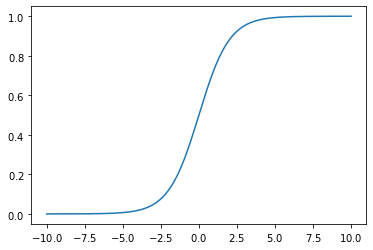

In [5]:
p = np.linspace(-10, 10, 200)

fig, ax = plt.subplots()

ax.plot(p, sigmoid(p))


Notice that the sigmoid scales all output to be in $z_i \in (0, 1)$

This means that we need to ensure that our training set set is likewise mapped to $(0, 1)$, and if not, we need to transform it.

## Basic algorithm

* Training

  * We have $T$ pairs $(x^k, y^k)$ for $k = 1, \ldots, T$
  
  * We require that $g({\bf A x}^k) = {\bf y}^k$ for all $k$
  
    Recall that $g(p)$ is a scalar function that works element-by-element:
    
    $$z_i = g([{\bf A x}]_i) = g \left ( \sum_j A_{ij} x_j \right )$$
    
  * Find the elements of ${\bf A}$
  
    This is a minimization problem, where we are minimizing:
    
    $$f(A_{ij}) = \| g({\bf A x}^k) - {\bf y}^k \|^2$$
    
    We call this function the _cost function_.
    
    A common minimization technique is [_gradient descent_](https://en.wikipedia.org/wiki/Gradient_descent).
    
    Some caveats:
    
    * When you minimize with one set of training data, there is no guarantee that your are still minimimzed with respect to the others.  We do multiple _epochs_ or passes through the training data to fix this.
    
    * We often don't apply the full correction from gradient descent, but instead scale it by some $\eta < 1$ called the _learning rate_.
    
* Using the network

  With the trained ${\bf A}$, we can now use the network on data we haven't seen before

## Hidden layers

We can get better performance from a neural network by adding a hidden layer:

![hidden layers](nn_fig_hidden.png)

The side of the hidden layer is independent of the size of the input and output layers.  Now we have an additional matrix ${\bf B}$ to train.  This can all be done together using the same algorithm described above.  Where we now minimize:

$$f(A_{ls}, B_{ij}) = \sum_{l=1}^m (z_l - y_l)^2$$

$$\tilde{z}_i = g \left ( \sum_{j=1}^n B_{ij} x_j \right )$$

$$z_l = g \left ( \sum_{s=1}^k A_{ls} \tilde{z}_s \right )$$
